Выборка номер 31

In [202]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from math import sqrt
from scipy.stats import norm as norm_distr, nct as stud_distr, chi2 as hi2_distr, f as fisher_distr

## Задание 1

По числовой выборке № 1 объема 50 построить точные доверительные интервалы c уровнями доверия 0.99, 0.95 и 0.9, считая, что выборка взята из нормального распределения с параметрами $α$ и $σ^2$:\
a) для α, если $σ^2$ известно;\
б) для α, если $σ^2$ неизвестно;\
в) для $σ^2$, если α известно;\
г) для $σ^2$, если α неизвестно.


In [123]:
# Нормальное распределение
alpha = 0
sigma2 = 0.9
accs = ['0.99','0.95', '0.90']

X_n = np.array([-0.873, -0.153, -0.544,  0.442, -0.043, -0.741, -0.806, -0.622, -0.574, -1.048,
                -1.197, -0.994,  0.407, -0.253, -0.075,  0.968, -2.027,  2.466,  1.328,  0.336,
                -0.895, -1.518, -0.275, -0.837, -0.303, -0.702,  0.047,  0.325,  0.980, -0.837,
                -0.173, -0.697, -1.153, -0.281,  1.121,  0.205,  0.281, -0.266, -0.180, -0.667,
                -0.058, -1.203, -1.611,  1.618,  1.938, -1.447,  1.347,  1.308,  0.107, -1.411])

<!-- Ниже мы расччитаем\
$\overline{X}$ - выборочное среднее,\
$S^2$ - выборочную дисперсую,\
$S_{0}^2$ - несмещенное выборочное стандартное отклонение (двумя способами)\
\
По следствию из леммы Фишера
$\frac{(n-1)S_{0}^2}{\sigma^2}⋹\chi_{n-1}^{2}$\
\
Пусть $t_{\varepsilon}^{(1)}$ и $t_{\varepsilon}^{(2)}$ - квантили распределения $\chi_{n-1}^{2}$ уровней $\varepsilon/2 и $1-\varepsilon/2$ соответственно. Тогда ${1-ε/2}$ = P(t_{\varepsilon}^{(1)<\frac{(n-1)S_{0}^2}{\sigma^2}<t{\varepsilon}^{(2)}) = P(\frac)$$

---

Курсив Курсив *Курсив* -->

In [124]:
n = X_n.size

# выборочное среднее
X_ = np.average(X_n)

# выборочная дисперсия
S2 = np.average(X_n * X_n) - X_ ** 2  

# несмещенная выборочная дисперсия
S2_0 = S2 * n / (n - 1) 

# выборочная дисперсия при известном среднем
S2_1 = sum((X_n - alpha * np.ones(n)) ** 2) / n

# print('S2:\t', S2)
# print('X_:\t', X_)
# print('S2_0:\t', S2_0)
# print('S2_1:\t', S2_1)

a) Для построения интервала на $α$ при известном $σ^2$ можно воспользоваться тем, что $\sqrt{n}\frac{\overline{X} - \alpha}{\sigma}⋹N_{0,1}$

In [125]:
# считаем квантили стандартного нормального распределения (с точностью .3)
q_norm = [round(norm_distr.ppf(1 - 0.01 / 2), 3),
          round(norm_distr.ppf(1 - 0.05 / 2), 3), 
          round(norm_distr.ppf(1 - 0.1 / 2), 3)]

In [126]:
print('а) интервалы для alpha, когда sigma известна:')
for q, accuracy in zip(q_norm, accs):
    shift = q * sqrt(S2_1) / sqrt(n)
    print(f'при точности {accuracy} ({X_ - shift:.3f}, {X_ + shift:.3f}), длина {2*shift:.3f}')

а) интервалы для alpha, когда sigma известна:
при точности 0.99 (-0.542, 0.172), длина 0.714
при точности 0.95 (-0.457, 0.087), длина 0.544
при точности 0.90 (-0.413, 0.043), длина 0.456


б) Для построения интервала на $α$ при неизвестном $σ^2$ можно воспользоваться следствием леммы Фишера: $\sqrt{n}\frac{\overline{X} - \alpha}{S}⋹T_{n-1}$

In [127]:
# считаем квантили распределения Стьюдента с 49 степенями свободы (с точностью .3)
st = stud_distr(df = n - 1, nc = 0)
q_stud = [round(st.ppf(1 - 0.01 / 2), 3),
          round(st.ppf(1 - 0.05 / 2), 3),
          round(st.ppf(1 - 0.1 / 2), 3)]

In [128]:
print('б) интервалы для alpha, когда sigma не известна:')
for q, accuracy in zip(q_stud, accs):
    shift = q * sqrt(S2_0) / sqrt(n)
    print(f'при точности {accuracy} ({X_ - shift:.3f}, {X_ + shift:.3f}), длина {2*shift:.3f}')

б) интервалы для alpha, когда sigma не известна:
при точности 0.99 (-0.553, 0.184), длина 0.737
при точности 0.95 (-0.461, 0.092), длина 0.553
при точности 0.90 (-0.416, 0.046), длина 0.461


в) Для построения интервала на $σ^2$ при известном $\alpha$ можно воспользоваться одним из следствий леммы Фишера: $\frac{nS_{1}^2}{σ^2}⋹H_{n}$

In [129]:
# считаем квантили распределения Хи-квадрат с 50 степенями свободы (с точностью .3)
ch = hi2_distr(df=n)
q_ch50 = [(round(ch.ppf(0.01 / 2), 3), round(ch.ppf(1 - 0.01 / 2), 3)),
          (round(ch.ppf(0.05 / 2), 3), round(ch.ppf(1 - 0.05 / 2), 3)),
          (round(ch.ppf(0.1 / 2), 3),  round(ch.ppf(1 - 0.1 / 2),  3))]

In [130]:
print('в) интервалы для sigma, когда alpha известна:')
for i, accuracy in zip(range(3), accs):
    L = n*S2_1/q_ch50[i][1]
    R = n*S2_1/q_ch50[i][0]
    print(f'при точности {accuracy} ({L:.3f}, {R:.3f}), длина {R - L:.3f}')

в) интервалы для sigma, когда alpha известна:
при точности 0.99 (0.605, 1.718), длина 1.113
при точности 0.95 (0.673, 1.486), длина 0.813
при точности 0.90 (0.712, 1.383), длина 0.671


г) Для построения интервала на $σ^2$ при неизвестном $\alpha$ можно воспользоваться следствием леммы Фишера: $\frac{(n-1)S_{0}^2}{σ^2}⋹H_{n-1}$

In [131]:
# считаем квантили распределения Хи-квадрат с 49 степенями свободы (с точностью .3)
ch = hi2_distr(df=n-1)
q_ch49 = [(round(ch.ppf(0.01 / 2), 3), round(ch.ppf(1 - 0.01 / 2), 3)),
          (round(ch.ppf(0.05 / 2), 3), round(ch.ppf(1 - 0.05 / 2), 3)),
          (round(ch.ppf(0.1 / 2), 3),  round(ch.ppf(1 - 0.1 / 2),  3))]

In [132]:
print('в) интервалы для sigma, когда alpha не известна:')
for i, accuracy in zip(range(3), accs):
    L = (n-1)*S2_0/q_ch49[i][1]
    R = (n-1)*S2_0/q_ch49[i][0]
    print(f'при точности {accuracy} ({L:.3f}, {R:.3f}), длина {R - L:.3f}')

в) интервалы для sigma, когда alpha не известна:
при точности 0.99 (0.593, 1.702), длина 1.109
при точности 0.95 (0.660, 1.469), длина 0.809
при точности 0.90 (0.699, 1.367), длина 0.668


## Задание 2

In [133]:
# Равномерное распределение
a = 0
b = 1
eps = 0.11

X_u = np.array([0.696, 0.920, 0.120, 0.195, 0.635, 0.752, 0.148, 0.589, 0.341, 0.282, 
                0.499, 0.312, 0.150, 0.091, 0.322, 0.113, 0.578, 0.352, 0.187, 0.127, 
                0.496, 0.132, 0.789, 0.347, 0.175, 0.081, 0.558, 0.593, 0.826, 0.539])

По числовой выборке № 2 объема 30\
а) построить график эмпирической функции распределения и гистограмму;\
б) проверить основную гипотезу о равномерности распределения c помощью критерия Колмогорова;\
в) проверить основную гипотезу о равномерности распределения c помощью критерия хи-квадрат

In [134]:
n = X_u.size
X_u_sorted = np.sort(X_u)

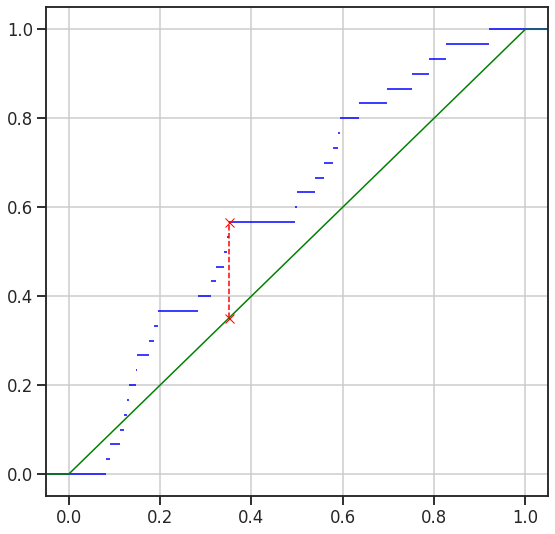

In [142]:
#строим графики эмпирического и истинного распределений
plt.figure(figsize=(9, 9))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
tmp = np.where(X_u_sorted <= X_u_sorted)[0]/n
plt.hlines(0, -1, X_u_sorted[0], linewidth=1.5, color='blue')
plt.hlines(1, X_u_sorted[n-1], 2, linewidth=1.5, color='blue')
for j in range(n - 1): plt.hlines(tmp[j + 1], X_u_sorted[j], X_u_sorted[j + 1], linewidth=1.5, color='blue')
plt.plot([-1, 0, 1, 2], [0, 0, 1, 1], linewidth=1.5, color='green')
plt.grid(True)

# находим и отмечаем статистическое расстояние между функциями распределений
D = max(max(abs(tmp - X_u_sorted)), abs(X_u_sorted[0]), abs(1-X_u_sorted[n-1]))
for elem, i in zip(tmp, range(len(tmp))):
  if abs(X_u_sorted[i]-elem) == D:
    plt.plot([X_u_sorted[i], X_u_sorted[i]], [X_u_sorted[i], tmp[i+1]], linewidth=1.5, color='red', marker='x', ls='--')

In [148]:
print(f'D = {D:.3f}')
print(f'D*sqrt(n) = {D*sqrt(n):.3f}')

D = 0.181
D*sqrt(n) = 0.993


В таблице приведенной на [сайте](http://smc.edu.nstu.ru/krit_kolm.htm) критические значение представлены для $P(\sqrt{n}D_n>c_{ɛ}) = ɛ$. Там можно видеть, что $c_{ɛ} ≈ 1.205$ для $ɛ=0.11$, т.е. по критерию незавимо от того, домножаем ли мы на $\sqrt{n}$, распределение с вероятностью $0.89$ равномерное на отрезке $[0,1]$.

Теперь мы хотим воспользоваться критерием $χ^2$ Пирсона для порверки гиптезы о том, что вероятности на распределены равномерно. Будем варьировать количество отрезков (параметр $k$).

In [181]:
def do_work(k: int) -> bool:
  # считаем попадания в каждый отрезок
  nu = [len([x for x in X_u if i/k <= x <= (i+1)/k]) for i in range(0,k)]

  # считаем величину, имеющую распределение Хи-квадрта (с k-1 степенью свободы)
  ro = sum([((nu[i]-n/k)**2)/(n/k) for i in range(k)])
  
  sns.displot(X_u, bins = [i/k for i in range(k+1)])
  plt.hlines(n/k, 0, 1)
  plt.show()

  return True if ro < hi2_distr(df=k-1).ppf(1 - eps) else False

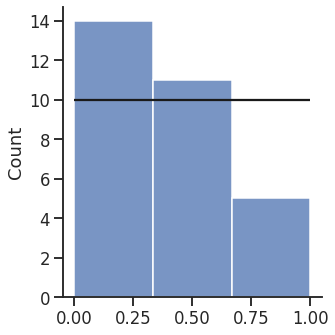

k = 3: равномерное


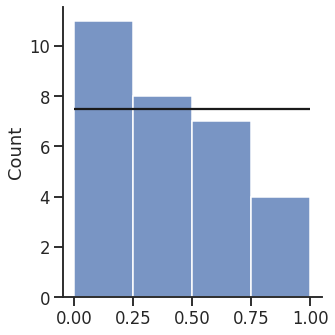

k = 4: равномерное


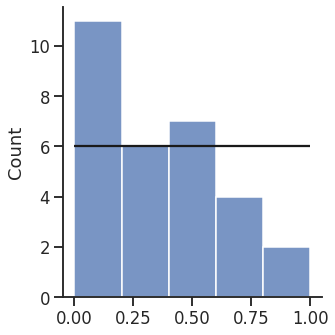

k = 5: не равномерное


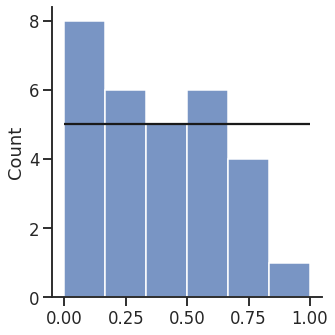

k = 6: равномерное


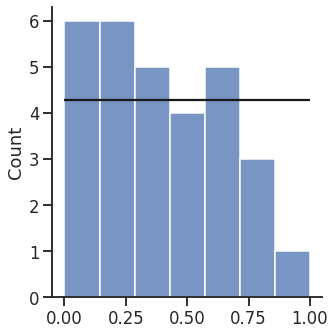

k = 7: равномерное


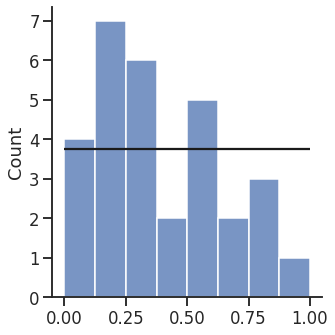

k = 8: равномерное


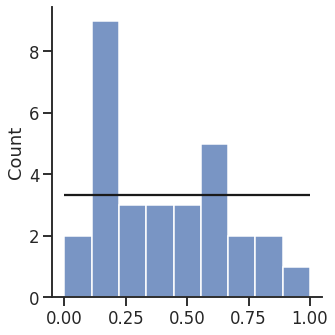

k = 9: не равномерное


In [183]:
for k in range(3, 10):
  print(f'k = {k}: ' + ('' if do_work(k) else 'не ') + 'равномерное')

## Задание 3

In [191]:
alpha = 0
sigma2 = 0.9
eps = 0.11

X = np.array([-0.873, -0.153, -0.544,  0.442, -0.043, -0.741, -0.806, -0.622, -0.574, -1.048,
              -1.197, -0.994,  0.407, -0.253, -0.075,  0.968, -2.027,  2.466,  1.328,  0.336,
              -0.895, -1.518, -0.275, -0.837, -0.303, -0.702,  0.047,  0.325,  0.980, -0.837])
Y = np.array([-0.173, -0.697, -1.153, -0.281,  1.121,  0.205,  0.281, -0.266, -0.180, -0.667,
              -0.058, -1.203, -1.611,  1.618,  1.938, -1.447,  1.347,  1.308,  0.107, -1.411])

# размеры выборок
n = X.size
m = Y.size

# выборочные средние
X_ =  np.average(X)
Y_ =  np.average(Y)

# несмещенные выборочные дисперсии
S0_X = sum((X - X_*np.ones(n))**2)/(n - 1)
S0_Y = sum((Y - Y_*np.ones(m))**2)/(m - 1)

In [193]:
#критерий Стьюдента

T = (X_-Y_)*sqrt((m+n-2)/(1/m+1/n))/sqrt(n*S0_X+m*S0_Y)

if abs(T) < stud_distr(df=n+m-2,nc=0).ppf(1-eps/2):
  print('Выборки имеют одинаковые alpha')
else:
  print('Выборки имеют разные alpha')

Выборки имеют одинаковые alpha


In [195]:
#критерий Стьюдента

f = fisher_distr(dfn=n-1,dfd=m-1)

if f.ppf(eps/2) < n*S0_X/(m*S0_Y) < f.ppf(1-eps/2):
  print('Выборки имеют одинаковые sigma2')
else:
  print('Выборки имеют разныеsigma2')

Выборки имеют одинаковые sigma2


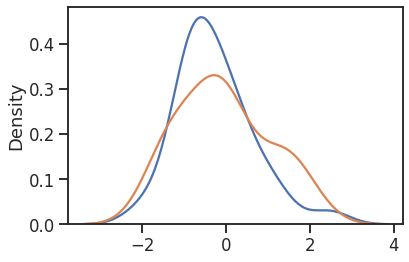

<Figure size 648x432 with 0 Axes>

In [213]:
sns.distplot(X, hist=False)
sns.distplot(Y, hist=False)
plt.figure(figsize=(9, 6))
plt.show()